## 1. 注意力可视化

In [1]:
import torch
import matplotlib.pyplot as plt
from torch import nn
from matplotlib import ticker
import warnings
warnings.filterwarnings("ignore")

# 绘制注意力热图
def show_attention(axis, attention):
    fig = plt.figure(figsize=(10,10))
    ax=fig.add_subplot(111)
    cax=ax.matshow(attention, cmap='bone')
    if axis is not None:
        ax.set_xticklabels(axis[0])
        ax.set_yticklabels(axis[1])
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    plt.show()

In [2]:
# 生成一个样例
sentence = ' I love deep learning more than machine learning'
tokens = sentence.split(' ')

attention_weights = torch.eye(8).reshape((8, 8)) + torch.randn((8, 8)) * 0.1  # 生成注意力权重矩阵
attention_weights

tensor([[ 9.8757e-01, -3.3269e-02, -6.4129e-03,  7.4444e-02, -9.9374e-03,
          8.6501e-02, -2.7283e-02,  7.9554e-02],
        [-1.4526e-01,  9.9452e-01, -1.0946e-01, -3.0252e-03, -8.7525e-02,
          6.3469e-02, -1.7428e-01,  9.7691e-02],
        [ 6.5311e-02, -1.3188e-01,  9.8884e-01,  1.0128e-01,  4.4508e-02,
         -5.3302e-02,  4.3820e-02, -4.7360e-02],
        [-1.2468e-01, -1.1606e-02,  2.9003e-02,  8.5149e-01,  1.4835e-01,
         -5.7268e-02, -5.0346e-02,  4.6933e-03],
        [-5.2518e-02,  3.6001e-02, -1.3409e-01,  8.4001e-02,  1.0626e+00,
          9.7431e-02, -4.4424e-02, -7.1158e-04],
        [ 2.8226e-02,  2.6271e-01,  4.2067e-02, -4.2097e-02,  1.5363e-01,
          1.1313e+00,  5.2735e-02, -1.6341e-01],
        [ 1.0850e-01, -4.2463e-02, -2.5154e-02,  1.2933e-01, -5.9269e-02,
          8.8615e-02,  1.0243e+00,  1.9031e-01],
        [ 1.4697e-01,  6.3187e-02,  6.1696e-02, -8.7981e-02, -1.0067e-01,
         -8.5357e-02, -3.2430e-02,  9.8060e-01]])

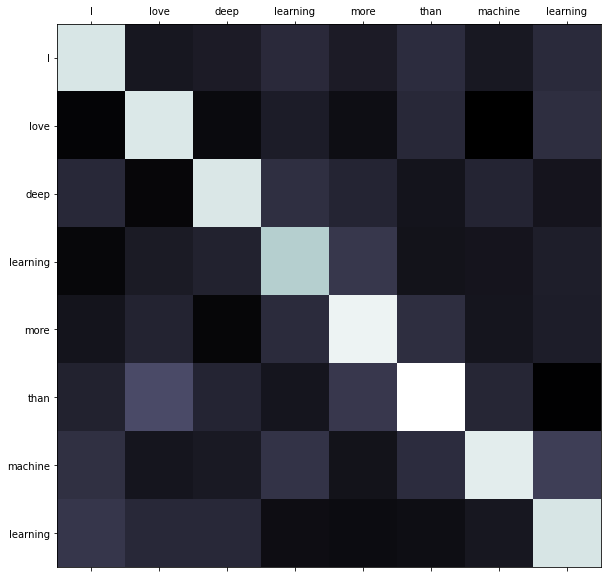

In [3]:
show_attention([tokens, tokens], attention_weights)  # 展示自注意力热图

## 2. 注意力池化

### 2.1 数据集生成

In [4]:
# 定义一个映射函数
def func(x):
    return x + torch.sin(x)  # 映射函数 y = x + sin(x)

n = 100  # 样本个数100
x, _ = torch.sort(torch.rand(n) * 10)   # 生成0-10的随机样本并排序
y = func(x) + torch.normal(0.0, 1, (n,))  # 生成训练样本对应的y值， 增加均值为0，标准差为1的扰动
x, y

(tensor([0.0932, 0.1369, 0.1464, 0.2588, 0.3617, 0.4888, 0.5750, 0.6377, 0.7767,
         0.9431, 1.2405, 1.3345, 1.3410, 1.3594, 1.4411, 1.5876, 1.7200, 1.8047,
         1.8210, 1.9156, 1.9657, 2.1769, 2.3423, 2.5221, 2.5958, 2.6168, 2.7542,
         3.2111, 3.2732, 3.4693, 3.6167, 3.6792, 3.6793, 3.6878, 3.8277, 3.8367,
         3.8376, 3.8876, 4.0447, 4.1571, 4.2137, 4.2324, 4.3410, 4.4588, 4.4594,
         4.9091, 4.9196, 5.0685, 5.2224, 5.3402, 5.3748, 5.3791, 5.4064, 5.4869,
         5.5518, 5.5796, 5.6379, 5.6441, 5.6606, 5.6656, 5.7890, 6.0018, 6.0525,
         6.1598, 6.2909, 6.3964, 6.4418, 6.6232, 6.6364, 6.7585, 7.3156, 7.4028,
         7.4515, 7.4991, 7.7147, 7.8343, 7.8439, 7.8470, 7.8872, 7.9275, 7.9587,
         8.0238, 8.2713, 8.3269, 8.3630, 8.6349, 8.6708, 8.7167, 8.7238, 8.8672,
         8.9560, 9.0643, 9.3687, 9.3806, 9.4898, 9.4994, 9.5740, 9.6834, 9.7924,
         9.8807]),
 tensor([ 1.8580,  0.4672, -0.6435,  1.1041, -1.2039,  0.8677,  2.2432,  1.7170,
         

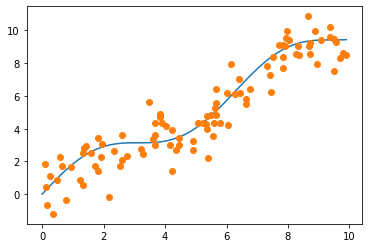

In [5]:
# 绘制曲线上的点
x_curve = torch.arange(0, 10, 0.1)  
y_curve = func(x_curve)
plt.plot(x_curve, y_curve)
plt.plot(x, y, 'o')
plt.show()

### 2.2 非参数注意力池化

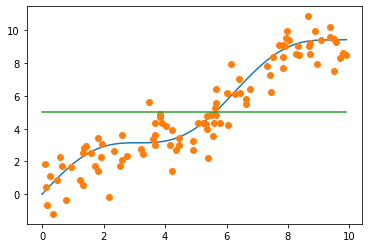

In [6]:
# 平均池化
y_hat = torch.repeat_interleave(y.mean(), n) # 将y_train中的元素进行复制，输入张量为y.mean, 重复次数为n
plt.plot(x_curve, y_curve)
plt.plot(x, y, 'o')
plt.plot(x_curve, y_hat)
plt.show()

In [7]:
# nadaraya-watson 核回归
x_nw = x_curve.repeat_interleave(n).reshape((-1, n))
x_nw.shape, x_nw

(torch.Size([100, 100]),
 tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.1000, 0.1000, 0.1000,  ..., 0.1000, 0.1000, 0.1000],
         [0.2000, 0.2000, 0.2000,  ..., 0.2000, 0.2000, 0.2000],
         ...,
         [9.7000, 9.7000, 9.7000,  ..., 9.7000, 9.7000, 9.7000],
         [9.8000, 9.8000, 9.8000,  ..., 9.8000, 9.8000, 9.8000],
         [9.9000, 9.9000, 9.9000,  ..., 9.9000, 9.9000, 9.9000]]))

In [8]:
# 带入公式得到注意力权重矩阵
attention_weights = nn.functional.softmax(-(x_nw - x)**2 / 2, dim=1)
attention_weights.shape, attention_weights

(torch.Size([100, 100]),
 tensor([[8.0585e-02, 8.0181e-02, 8.0073e-02,  ..., 3.5190e-22, 1.2183e-22,
          5.1098e-23],
         [7.5357e-02, 7.5307e-02, 7.5277e-02,  ..., 8.5860e-22, 3.0050e-22,
          1.2716e-22],
         [7.0189e-02, 7.0451e-02, 7.0490e-02,  ..., 2.0866e-21, 7.3827e-22,
          3.1517e-22],
         ...,
         [5.8540e-22, 8.9043e-22, 9.7487e-22,  ..., 6.4303e-02, 6.4038e-02,
          6.3270e-02],
         [2.3868e-22, 3.6464e-22, 3.9960e-22,  ..., 6.8407e-02, 6.8871e-02,
          6.8649e-02],
         [9.6921e-23, 1.4872e-22, 1.6313e-22,  ..., 7.2478e-02, 7.3769e-02,
          7.4183e-02]]))

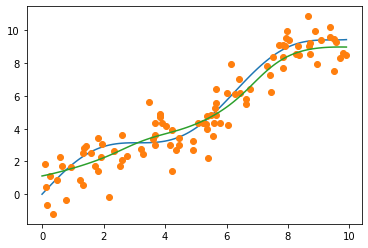

In [9]:
# y_hat为注意力权重和y值的乘积，是加权平均值
y_hat = torch.matmul(attention_weights, y)
plt.plot(x_curve, y_curve)
plt.plot(x, y, 'o')
plt.plot(x_curve, y_hat)
plt.show()

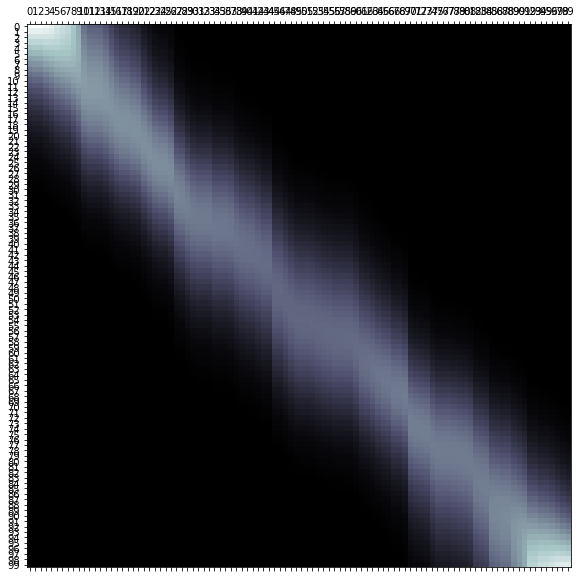

In [10]:
show_attention(None, attention_weights) # 展示注意力热图